In [99]:
# load packages
if (!require(pacman)) install.packages("pacman")
pacman::p_load(pacman, RPostgreSQL, ggplot2, tidyverse, dplyr)

In [2]:
tryCatch({
    drv <- dbDriver("PostgreSQL")
    print("Connecting to Database…")
    connec <- dbConnect(drv, 
                 dbname = "mydb",
                 host = "192.168.0.151", 
                 port = "5432",
                 user = "postgres", 
                 password = "headband")
    print("Database Connected!")
    },
    error=function(cond) {
            print("Unable to connect to Database.")
    })

[1] "Connecting to Database…"
[1] "Database Connected!"


In [56]:
df <- dbGetQuery(connec, "SELECT * FROM \"SP500LM\"")
tail(df)

,symbol,priceToSales,priceToBook,dividendYield,debtToEquity,marketCap,CARG,CANSG,opMarg,intCov,sector,rating
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
497,XYL,3.135184,5.505256,0.0130,78.166,16337443840,-0.0007685965,0,0.1362332,7.078947,Industrials,2.500000
498,YUM,4.847612,0.000000,0.0186,0.000,32212383744,0.0499569186,0,0.2329258,3.096189,Consumer Cyclical,1.857143
499,ZBH,2.855887,1.838131,0.0087,53.098,22555797504,-0.0040788575,0,0.1954320,7.193858,Healthcare,2.500000
500,ZBRA,2.560271,6.823679,0.0000,43.221,14624266240,0.1008117913,0,0.1862731,213.800000,Technology,2.666667
501,ZION,2.823184,1.163843,0.0279,0.000,8190056448,0.0413673890,0,0.2915183,0.000000,Financial Services,2.666667
502,ZTS,9.156736,19.260940,0.0071,144.912,72255807488,0.1010567650,0,0.2992832,9.879464,Healthcare,1.250000


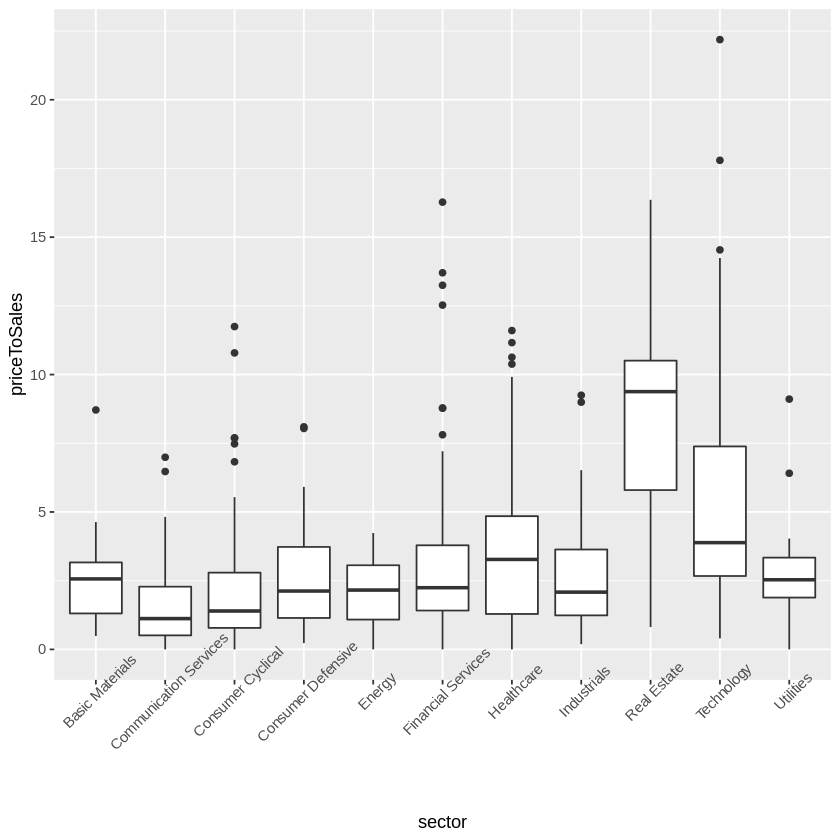

In [49]:
ggplot(df, aes(x=sector, y=priceToSales)) + geom_boxplot() + theme(axis.text.x = element_text(angle=45))

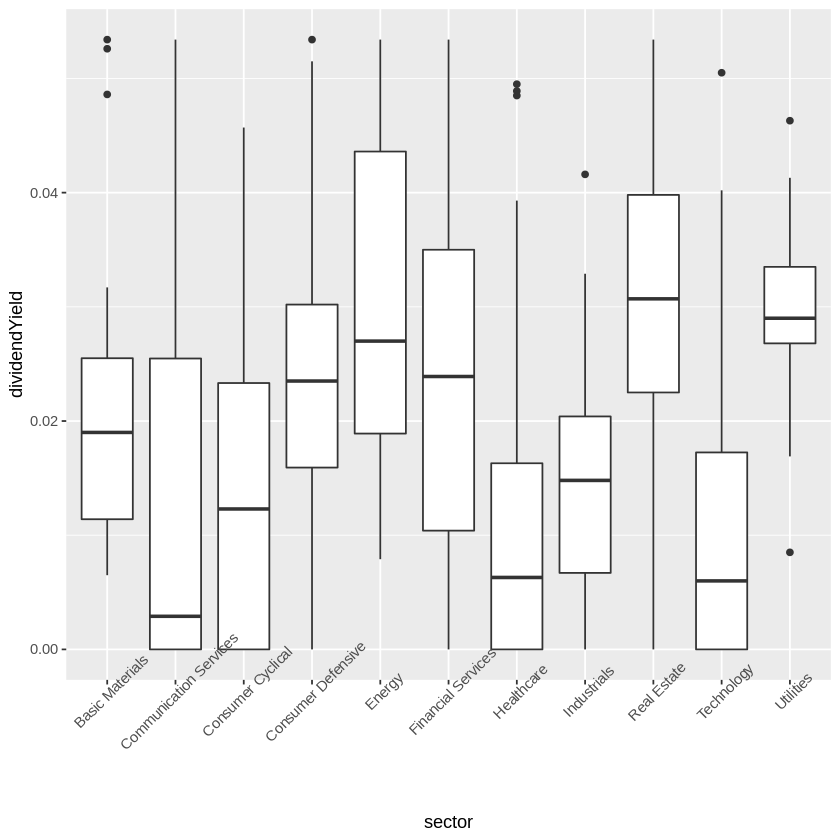

In [57]:
ggplot(df, aes(x=sector, y=dividendYield)) + geom_boxplot() + theme(axis.text.x = element_text(angle=45))

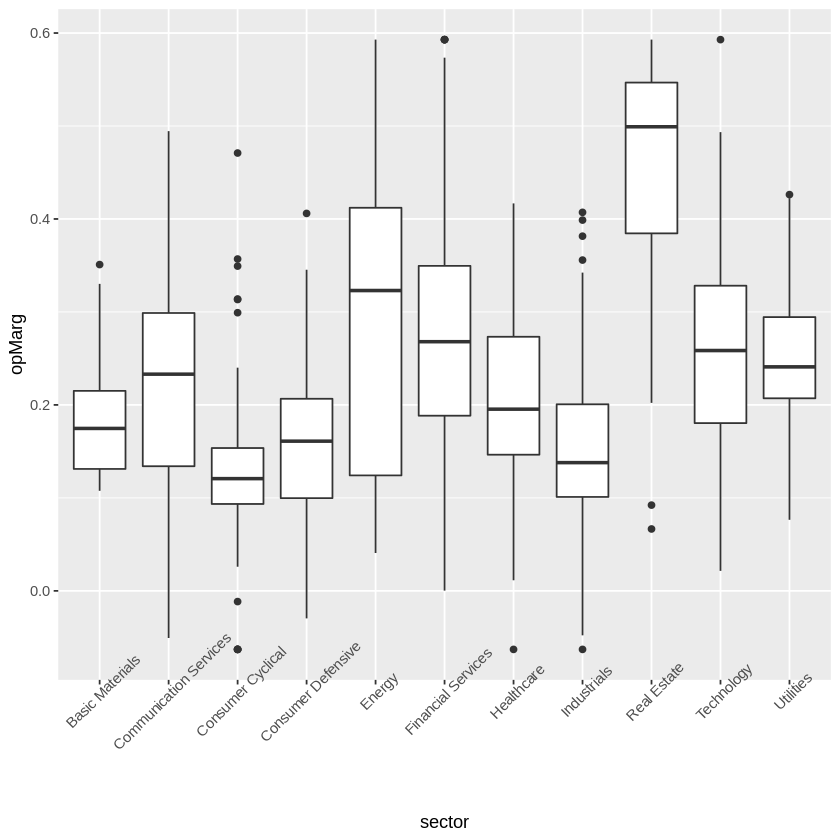

In [58]:
ggplot(df, aes(x=sector, y=opMarg)) + geom_boxplot() + theme(axis.text.x = element_text(angle=45))

,symbol,priceToSales,priceToBook,dividendYield,debtToEquity,marketCap,CARG,CANSG,opMarg,intCov,sector,rating
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
157,EL,4.3433313,14.333968,0.0088,110.523,78666416128,0.05821139,0.000000000,0.18500557,20.98844,Consumer Defensive,1.727273
225,HRL,2.0136251,3.810466,0.0211,45.212,25088436224,0.06034583,0.005112769,0.10816551,23.13561,Consumer Defensive,3.000000
12,ADM,0.4843027,2.191079,0.0193,50.788,45700739072,0.09830687,0.053573828,-0.02959775,24.88679,Consumer Defensive,2.600000
366,PG,3.8900514,6.901905,0.0263,67.215,311931535360,0.05811584,0.442118260,0.23009448,38.09339,Consumer Defensive,1.833333
110,COST,0.9699068,13.456687,0.0067,44.050,210991595520,0.11479989,0.000000000,0.04531590,52.38596,Consumer Defensive,1.800000
307,MNST,8.0988750,9.107746,0.0000,0.500,47103950848,0.13324502,0.004730752,0.26888066,392.81342,Consumer Defensive,2.500000


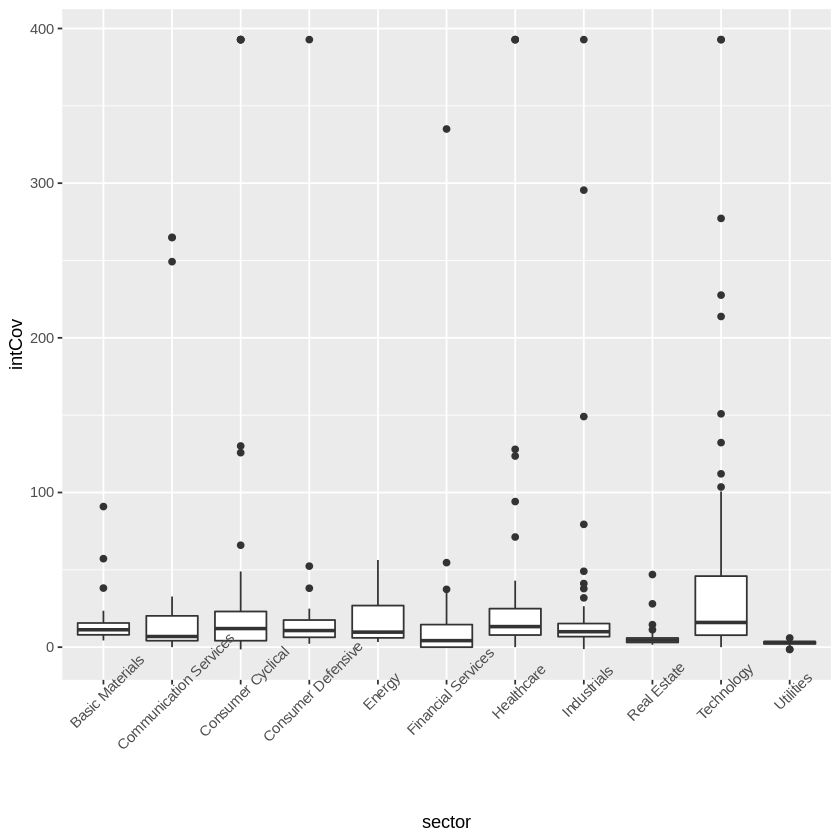

In [59]:
test_cyc = subset(df, sector == "Consumer Defensive")
tail(test_cyc[order(test_cyc$intCov),])

ggplot(df, aes(x=sector, y=intCov)) + geom_boxplot() + theme(axis.text.x = element_text(angle=45))

,symbol,priceToSales,priceToBook,dividendYield,debtToEquity,marketCap,CARG,CANSG,opMarg,intCov,sector,rating
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
36,ANET,11.229631,2.647189,0.000,1.384,35458023424,0.11069462,0.4421183,0.3237822,0.000000,Technology,2.363636
185,FFIV,3.426164,4.481531,0.000,26.674,9174612992,0.06396900,0.4421183,0.3036429,0.000000,Technology,2.625000
263,KLAC,5.246267,15.692973,0.011,476.075,48327995392,0.26324296,0.4421183,0.2914832,0.000000,Technology,2.222222
281,LRCX,3.228145,10.485836,0.012,79.731,55611383808,0.21374443,0.4421183,0.2414883,0.000000,Technology,2.150000
293,MCHP,5.192484,3.244548,0.016,133.170,35417415680,0.08434484,0.4421183,0.3437371,11.061089,Technology,1.857143
471,VRSN,14.536477,0.000000,0.000,0.000,19964049408,0.02997862,0.4421183,0.5928969,9.694937,Technology,3.000000


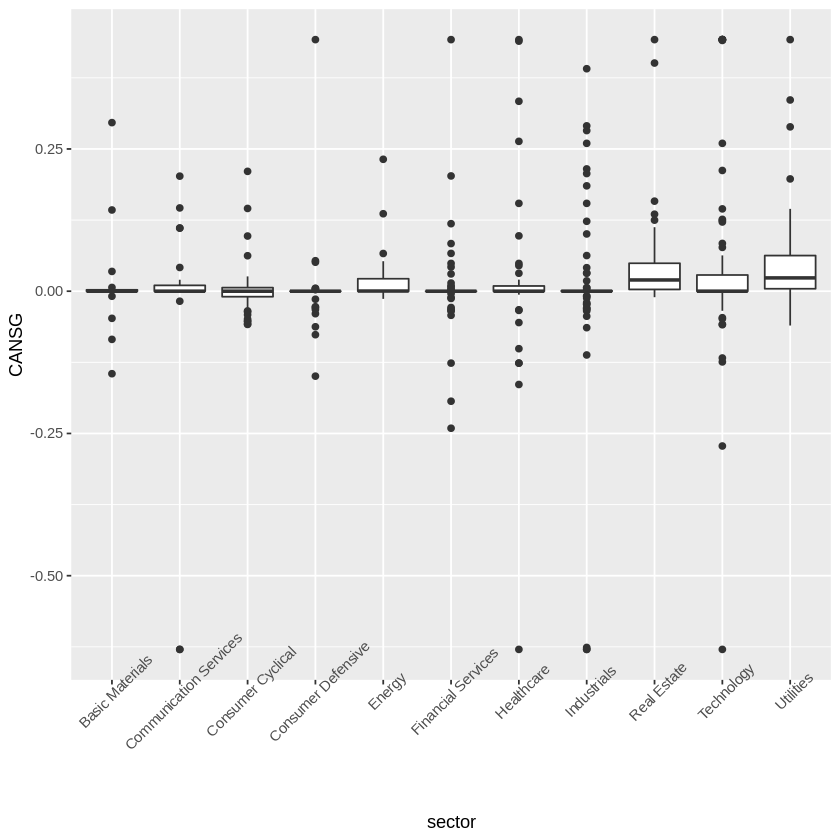

In [60]:
test_cansg = subset(df, sector == "Technology")
tail(test_cansg[order(test_cansg$CANSG),])

ggplot(df, aes(x=sector, y=CANSG)) + geom_boxplot() + theme(axis.text.x = element_text(angle=45))

,symbol,priceToSales,priceToBook,dividendYield,debtToEquity,marketCap,CARG,CANSG,opMarg,intCov,sector,rating
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
105,CNC,0.3568911,1.762078,0.0000,83.680,46481850368,0.2773785,0.000000000,0.03277978,6.323308,Healthcare,1.818182
150,DXCM,3.0449908,4.267568,0.0000,94.751,8140478464,0.3338239,0.000000000,0.19001796,4.411765,Healthcare,2.250000
472,VRTX,9.5678800,8.620013,0.0000,7.999,76041682944,0.3544536,-0.006057656,0.41676951,42.983740,Healthcare,2.300000
95,CI,0.5371745,2.022405,0.0163,73.102,95073427456,0.4070775,0.000000000,0.06126098,5.531538,Healthcare,2.117647
314,MRNA,2.1643136,18.782501,0.0000,5.546,48913485824,0.4070775,0.000000000,-0.06295800,392.813417,Healthcare,3.200000
392,REGN,4.7639020,6.895521,0.0000,13.560,78642970624,0.4070775,0.000000000,0.38647089,123.582897,Healthcare,2.692308


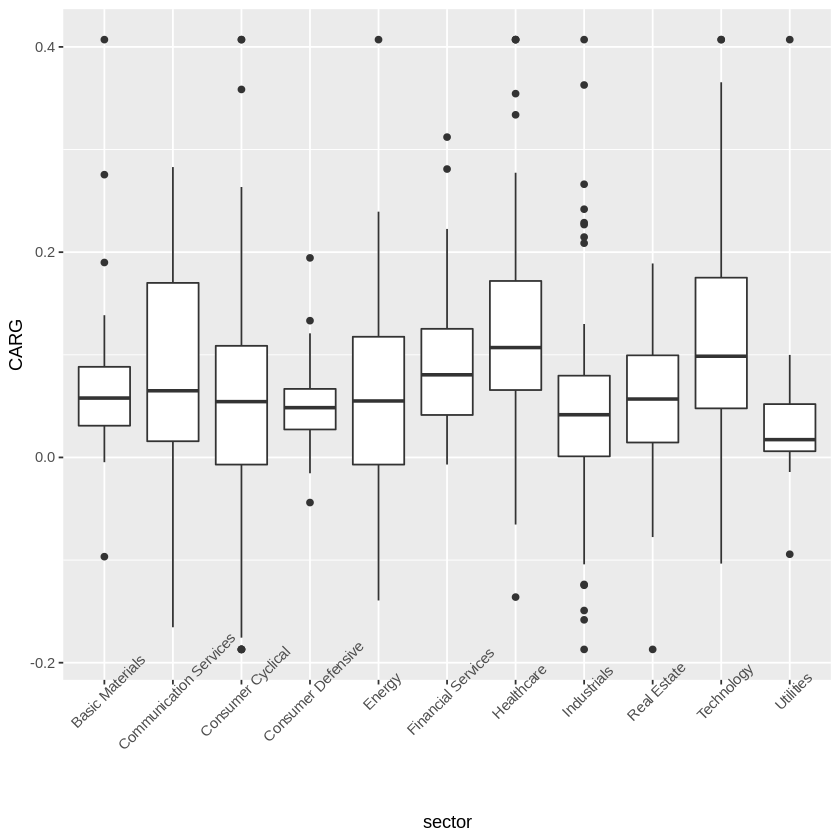

In [61]:
test_carg = subset(df, sector == "Healthcare")
tail(test_carg[order(test_carg$CARG),])

ggplot(df, aes(x=sector, y=CARG)) + geom_boxplot() + theme(axis.text.x = element_text(angle=45))

,symbol,priceToSales,priceToBook,dividendYield,debtToEquity,marketCap,CARG,CANSG,opMarg,intCov,sector,rating
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
353,ORCL,3.957854,20.461940,0.0164,0.000,25.84706,0.024160905,-0.001252388,0.3304686,3.462432,Technology,2.700000
116,CSCO,3.368790,4.445404,0.0335,25.985,25.88097,0.003276903,-0.003692556,0.3012853,35.608295,Technology,2.684211
48,AVGO,6.306811,7.797709,0.0306,188.023,25.96589,0.096382079,0.000000000,0.4653466,7.301857,Technology,1.200000
341,NVDA,10.590220,4.607480,0.0009,45.008,26.46898,0.318381540,0.440677729,0.3607758,38.593220,Technology,2.000000
318,MSFT,9.106365,13.470004,0.0088,47.075,28.22187,0.163571170,0.034525303,0.4361364,43.495359,Technology,1.592593
4,AAPL,6.015734,34.274002,0.0057,205.984,28.47747,0.113028291,0.126278356,0.2841341,39.333837,Technology,2.050000


Warning message:
“Removed 10 rows containing non-finite values (stat_boxplot).”


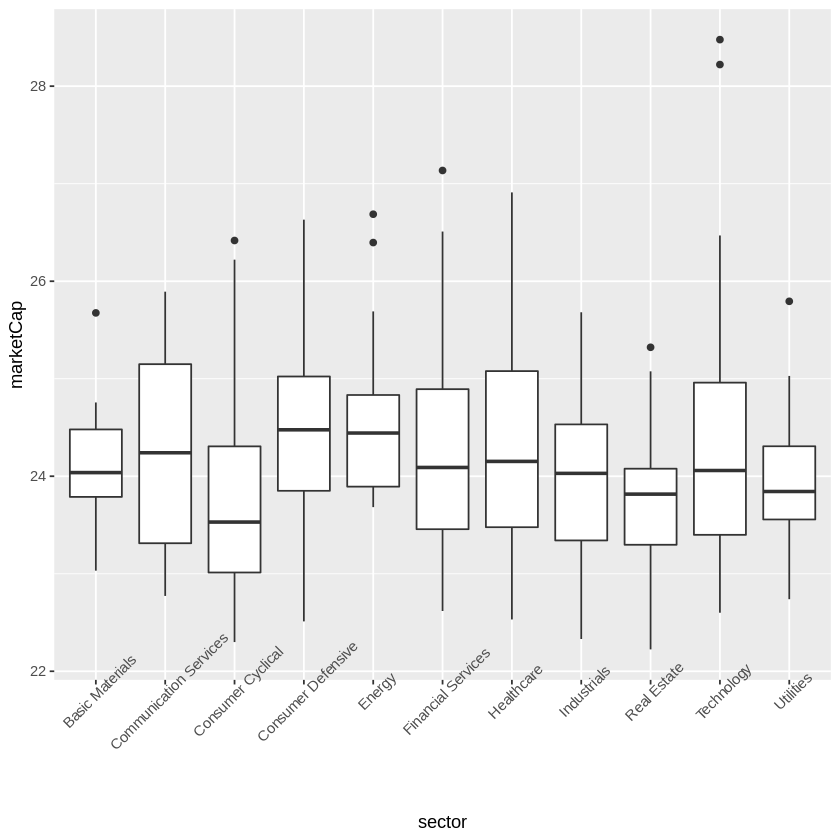

In [69]:
test_marketCap = subset(df, sector == "Technology")
tail(test_marketCap[order(test_marketCap$marketCap),])

ggplot(df, aes(x=sector, y=marketCap)) + geom_boxplot() + theme(axis.text.x = element_text(angle=45))

,symbol,priceToSales,priceToBook,dividendYield,debtToEquity,marketCap,CARG,CANSG,opMarg,intCov,sector,rating
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
477,WAT,5.9457110,45.627945,0.0000,408.595,17051710464,0.048048096,0.003311143,0.27985865,16.629000,Healthcare,2.750000
5,ABBV,4.2414446,18.573164,0.0393,451.440,243242598400,0.197111448,0.000000000,0.39994163,9.400330,Healthcare,2.583333
147,DVA,0.7569899,7.403483,0.0000,493.730,8793460736,0.005998282,-0.163934017,0.17271161,6.902272,Healthcare,3.000000
6,ABC,0.1256231,0.000000,0.0126,857.149,28851394560,0.084103101,0.008274333,0.01138503,14.607908,Healthcare,2.272727
32,AMGN,4.9194274,14.165639,0.0314,994.450,129459642368,0.030389266,0.008984578,0.40917516,7.736842,Healthcare,2.777778
322,MTD,6.7218914,45.627945,0.0000,994.450,25982576640,0.081916215,0.000000000,0.21809499,21.017182,Healthcare,3.250000


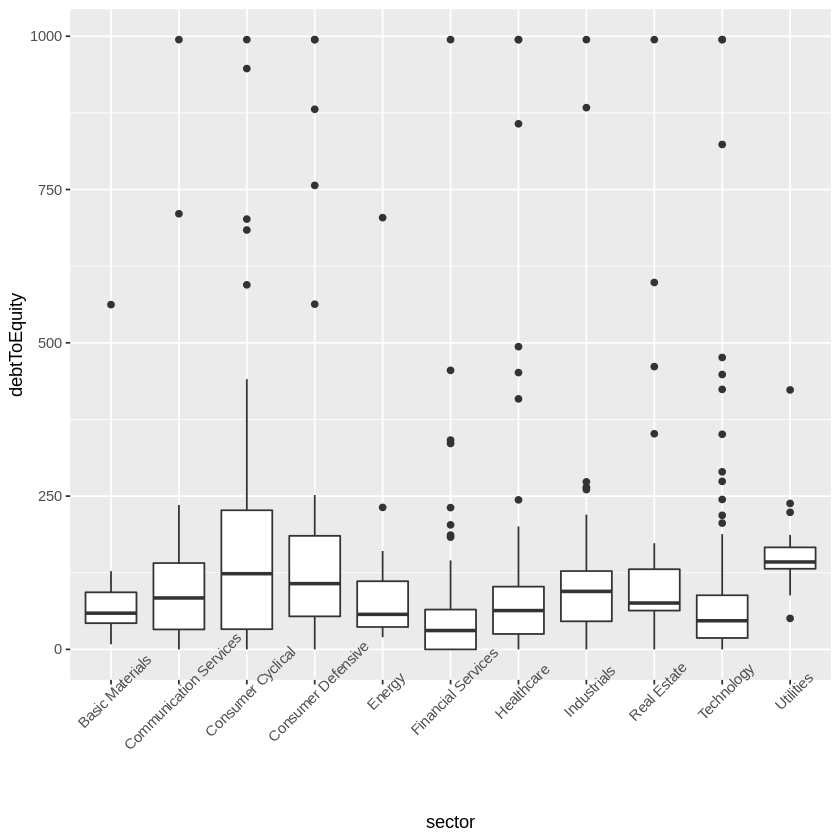

In [64]:
test_debtToEquity = subset(df, sector == "Healthcare")
tail(test_debtToEquity[order(test_debtToEquity$debtToEquity),])

ggplot(df, aes(x=sector, y=debtToEquity)) + geom_boxplot() + theme(axis.text.x = element_text(angle=45))

,symbol,priceToSales,priceToBook,dividendYield,debtToEquity,marketCap,CARG,CANSG,opMarg,intCov,sector,rating
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
502,ZTS,9.1567360,19.26094,0.0071,144.912,72255807488,0.10105677,0.000000000,0.2992832,9.879464,Healthcare,1.250000
276,LLY,10.3813930,41.93240,0.0119,174.931,304411508736,0.09625590,-0.033745586,0.2487467,21.367569,Healthcare,2.100000
233,IDXX,8.6950810,45.39002,0.0000,200.624,28469450752,0.13253976,0.005644331,0.2114871,25.347088,Healthcare,2.125000
215,HCA,0.9975712,45.62794,0.0105,0.000,59959013376,0.07968804,0.000000000,0.1561414,5.720945,Healthcare,1.791667
322,MTD,6.7218914,45.62794,0.0000,994.450,25982576640,0.08191622,0.000000000,0.2180950,21.017182,Healthcare,3.250000
477,WAT,5.9457110,45.62794,0.0000,408.595,17051710464,0.04804810,0.003311143,0.2798586,16.629000,Healthcare,2.750000


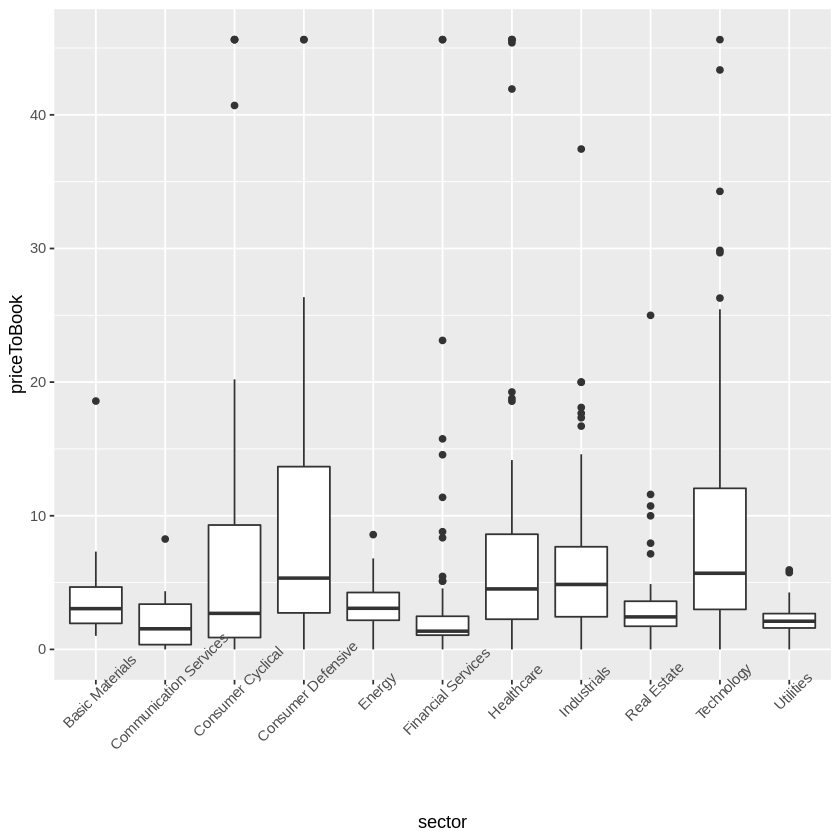

In [65]:
test_priceToBook = subset(df, sector == "Healthcare")
tail(test_priceToBook[order(test_priceToBook$priceToBook),])

ggplot(df, aes(x=sector, y=priceToBook)) + geom_boxplot() + theme(axis.text.x = element_text(angle=45))

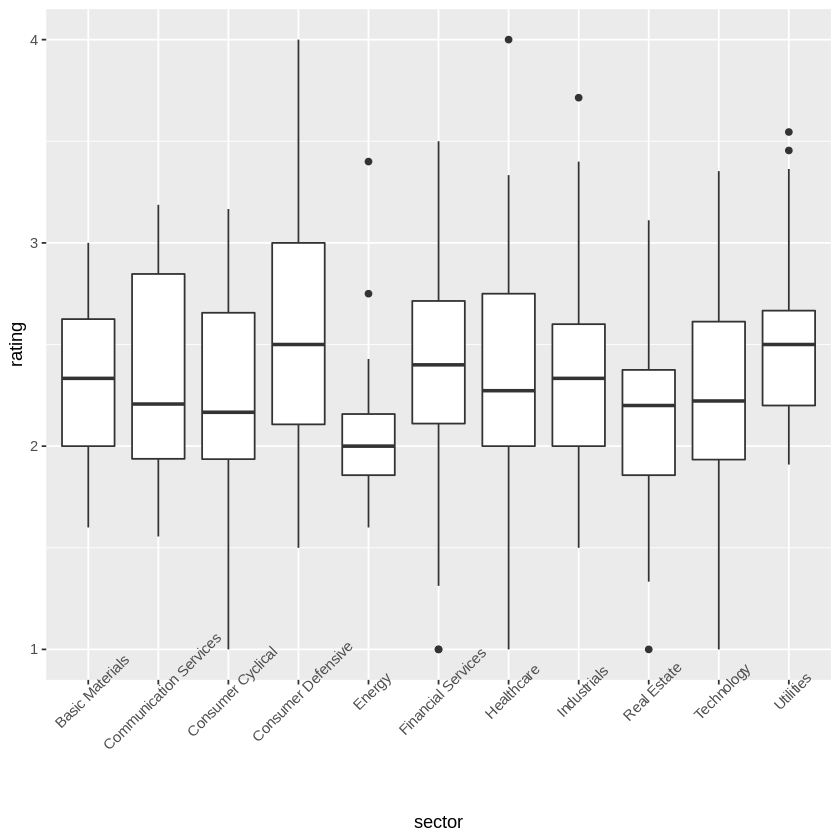

In [66]:
ggplot(df, aes(x=sector, y=rating)) + geom_boxplot() + theme(axis.text.x = element_text(angle=45))

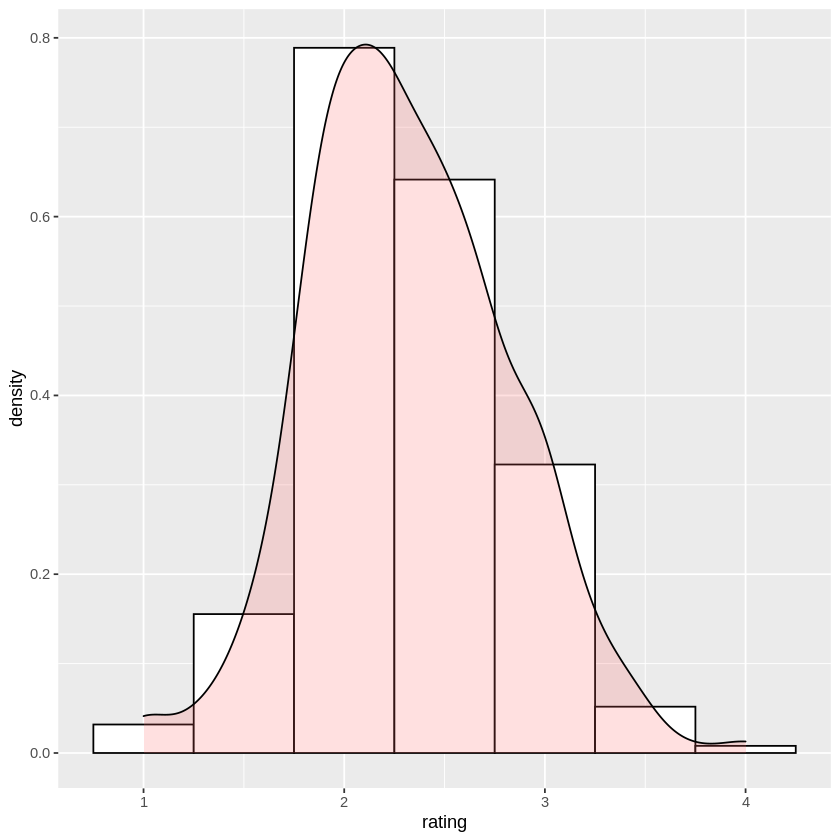

In [43]:
ggplot(df, aes(x=rating)) + 
    geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                   binwidth=.5,
                   colour="black", fill="white") +
    geom_density(alpha=.2, fill="#FF6666")

In [102]:
colnames(df)

[1] "symbol"        "priceToSales"  "priceToBook"   "dividendYield"
 [5] "debtToEquity"  "marketCap"     "CARG"          "CANSG"        
 [9] "opMarg"        "intCov"        "sector"        "rating"       
[13] "id"

In [100]:
set.seed(1)

#create ID column
df$id <- 1:nrow(df)

#use 70% of dataset as training set and 30% as test set 
train <- df %>% dplyr::sample_frac(0.70)
test  <- dplyr::anti_join(df, train, by = 'id')

In [124]:
model <- lm(rating ~ priceToSales+priceToBook+dividendYield+debtToEquity+marketCap+CARG+CANSG+opMarg+intCov+ sector-1, train)
summary(model)


Call:
lm(formula = rating ~ priceToSales + priceToBook + dividendYield + 
    debtToEquity + marketCap + CARG + CANSG + opMarg + intCov + 
    sector - 1, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.52975 -0.33580 -0.05325  0.33495  1.23409 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
priceToSales                  1.006e-02  1.165e-02   0.863    0.389    
priceToBook                  -2.727e-03  3.646e-03  -0.748    0.455    
dividendYield                 1.014e+01  2.046e+00   4.957 1.14e-06 ***
debtToEquity                  2.532e-04  1.593e-04   1.589    0.113    
marketCap                    -2.164e-13  1.886e-13  -1.147    0.252    
CARG                         -5.045e-01  2.704e-01  -1.865    0.063 .  
CANSG                        -2.104e-01  2.159e-01  -0.974    0.331    
opMarg                       -3.070e-02  2.533e-01  -0.121    0.904    
intCov                        6.526e-04  4.298e-04   1.518    0

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



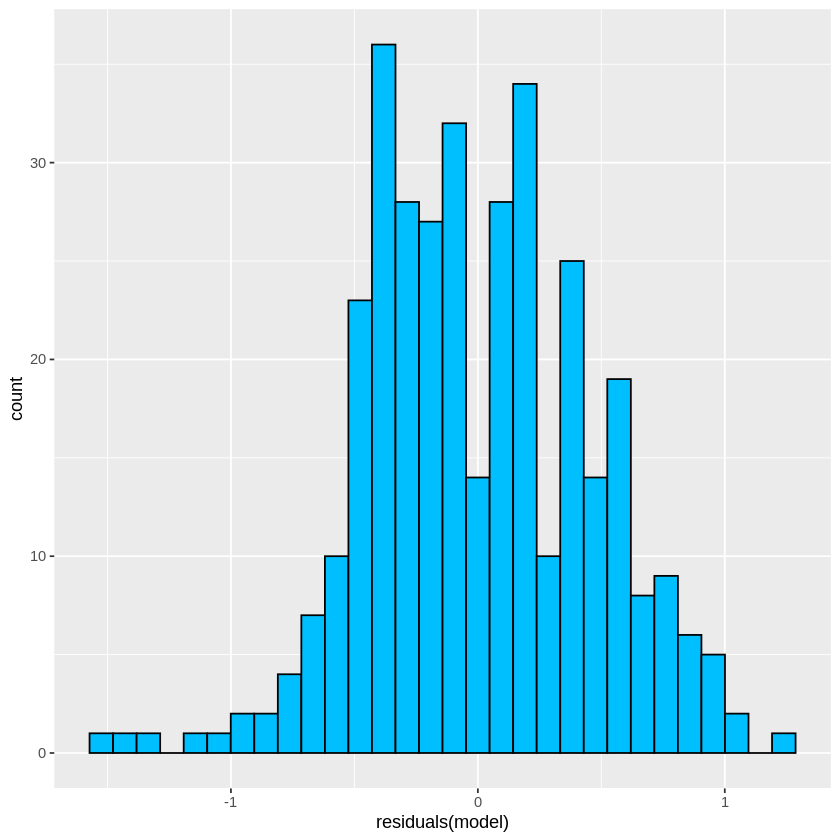

In [126]:
modelResiduals <- as.data.frame(residuals(model)) 

ggplot(modelResiduals, aes(residuals(model))) +
  geom_histogram(fill='deepskyblue', color='black')

In [129]:
# test model on new data
preds <- predict(sp500model, test)

In [134]:
modelEval <- cbind(test$rating, preds)
colnames(modelEval) <- c('Actual', 'Predicted')
modelEval <- as.data.frame(modelEval)
head(modelEval)

,Actual,Predicted
,<dbl>,<dbl>
1,2.583333,2.587791
2,2.272727,2.545884
3,2.666667,2.265010
4,1.733333,2.357230
5,2.266667,2.357168
6,1.961538,2.158867


In [132]:
mse <- mean((modelEval$Actual - modelEval$Predicted)**2)
rmse <- sqrt(mse)

In [135]:
df$lmPred = predict(sp500model, df)

In [137]:
dbWriteTable(connec,"SP500LM",df,overwrite = TRUE, row.names = FALSE)

[1] TRUE